Week 8 · Day 1 — Classic CNN Architectures Tour
Why this matters

Architectures like LeNet, AlexNet, VGG, ResNet shaped modern deep learning. Understanding their evolution shows why design choices (depth, pooling, skip connections) matter — and prepares you to use pretrained models.

Theory Essentials

LeNet (1990s): first CNN for digit recognition (shallow, 5 layers).

AlexNet (2012): deeper, ReLU + dropout + GPUs, sparked deep learning boom.

VGG (2014): very deep with small (3×3) conv filters.

ResNet (2015): introduced skip connections → trains 100+ layers.

torchvision.models: gives pretrained versions of these architectures.

LeNet params: 44426
AlexNet params: 61100840
VGG16 params: 138357544
ResNet18 params: 11689512


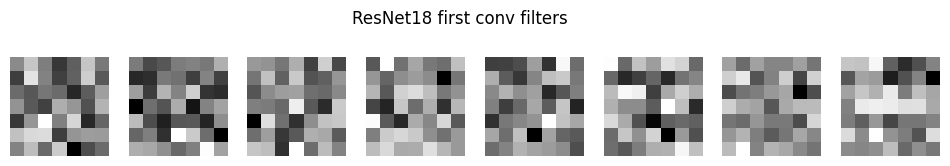

In [1]:
# Setup
import torch, torch.nn as nn
import torchvision.models as models
import matplotlib.pyplot as plt

torch.manual_seed(42)

# ---------- LeNet-like ----------
class LeNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 6, 5), nn.ReLU(), nn.AvgPool2d(2),
            nn.Conv2d(6, 16, 5), nn.ReLU(), nn.AvgPool2d(2)
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(16*4*4, 120), nn.ReLU(),
            nn.Linear(120, 84), nn.ReLU(),
            nn.Linear(84, 10)
        )
    def forward(self, x):
        return self.fc(self.conv(x))

lenet = LeNet()
print("LeNet params:", sum(p.numel() for p in lenet.parameters()))

# ---------- AlexNet / VGG / ResNet from torchvision ----------
alexnet = models.alexnet(weights=None)
vgg16   = models.vgg16(weights=None)
resnet18 = models.resnet18(weights=None)

print("AlexNet params:", sum(p.numel() for p in alexnet.parameters()))
print("VGG16 params:", sum(p.numel() for p in vgg16.parameters()))
print("ResNet18 params:", sum(p.numel() for p in resnet18.parameters()))

# Visualize first conv layer of ResNet
weights = resnet18.conv1.weight.data.clone()
grid = weights[:8].permute(0,2,3,1)  # show 8 filters
fig, axs = plt.subplots(1,8, figsize=(12,2))
for i in range(8):
    axs[i].imshow(grid[i].numpy()[:,:,0], cmap="gray")
    axs[i].axis("off")
plt.suptitle("ResNet18 first conv filters")
plt.show()


### 🔹 Your LeNet-like definition

```python
self.conv = nn.Sequential(
    nn.Conv2d(1, 6, 5), nn.ReLU(), nn.AvgPool2d(2),
    nn.Conv2d(6, 16, 5), nn.ReLU(), nn.AvgPool2d(2)
)
self.fc = nn.Sequential(
    nn.Flatten(),
    nn.Linear(16*4*4, 120), nn.ReLU(),
    nn.Linear(120, 84), nn.ReLU(),
    nn.Linear(84, 10)
)
```

---

### 🔹 Original **LeNet-5** layers (from the 1998 paper)

LeNet-5 had **5 learnable layers**:

1. **Conv1** → 6 filters of size 5×5 (input: 32×32 image, output: 28×28×6).
2. **Pool1** → subsampling (average pooling, 2×2).
3. **Conv2** → 16 filters of size 5×5.
4. **Pool2** → subsampling (average pooling, 2×2).
5. **FC layers** → 3 fully connected layers (120 → 84 → 10 classes).

So in your code:

* **Conv1 → Pool1 → Conv2 → Pool2** = the convolutional part.
* **Flatten → FC1 → FC2 → FC3** = the classifier part.

That’s why we call it “LeNet-5” → it has **5 main trainable layers** (Conv1, Conv2, FC1, FC2, FC3).
Pooling layers are not counted as "layers with parameters" since they don’t learn weights.

---

### 🔹 Why your code shows different architectures too

* You build **LeNet** manually (tiny, \~60K params).
* Then you load **AlexNet**, **VGG16**, **ResNet18** (big modern CNNs from torchvision).
* You compare parameter counts → showing how much deeper/wider modern nets are compared to LeNet.

---

### 🔹 The last part

```python
weights = resnet18.conv1.weight.data.clone()
```

* You extract the **first convolution filters** of ResNet18 (64 filters of size 7×7×3).
* You plot the first 8 filters → grayscale view of learned edge detectors / blobs (random right now, since weights=None).

If you trained the model, those filters would look like **edges, corners, color blobs** (basic features).


1) Core (10–15 min)

Task: Print the .features (conv layers) of AlexNet and VGG16.

In [5]:
print("AlexNet Features")
print(alexnet.features)

print("VGG16")
print(vgg16.features)


AlexNet Features
Sequential(
  (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU(inplace=True)
  (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace=True)
  (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace=True)
  (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
)
VGG16
Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  

2) Practice (10–15 min)

Task: Count layers in VGG16 vs ResNet18.

In [8]:
print(sum(1 for m in vgg16.modules() if isinstance(m, nn.Conv2d)))

print(sum(1 for m in resnet18.modules() if isinstance(m, nn.Conv2d)))

13
20


3) Stretch (optional, 10–15 min)

Task: Compare parameter counts of ResNet18 vs VGG16 and explain why ResNet is more efficient despite depth.

VGG16 params:   138357544
ResNet18 params: 11689512
### 🔹 Why ResNet is more efficient

1. **VGG16**:

   * Uses **many 3×3 conv layers** stacked back to back.
   * No shortcuts, so every feature has to pass through all layers.
   * Very wide fully connected layers at the end (huge parameter count).

2. **ResNet18**:

   * Uses **residual blocks** → you add a **skip connection** that lets the input bypass some conv layers.
   * This means the network can learn *residuals* (differences), not full transformations → training is easier and requires fewer parameters.
   * Fully connected part is tiny (just one linear layer at the end).
   * Many filters are reused inside small blocks instead of expanding layer width.

So ResNet achieves **greater depth without blowing up parameter count**.

---

### 🔹 Skip connections

* A skip connection literally adds:

  $$
  y = F(x) + x
  $$

  where $F(x)$ = output of conv layers in the block.
* This helps gradients flow back more easily (solving vanishing gradient).
* Lets the network behave like an *ensemble of shallow and deep paths*.

---

### 🔹 Bottleneck blocks (used in ResNet-50 and above)

* Instead of doing a full 3×3 conv on many channels, ResNet often does:
  1×1 conv (reduce channels) → 3×3 conv → 1×1 conv (expand back).
* Example: take 256 channels → shrink to 64 → process → expand to 256.
* This saves parameters and compute while keeping representational power.

ResNet18 doesn’t use bottleneck blocks (it uses “basic blocks”), but deeper ResNets (50, 101, 152) do.

---

✅ **Summary**:
ResNet is more efficient because it:

* Uses **skip connections** (learn residuals, not full transforms).
* Avoids massive FC layers like VGG16.
* In deeper versions, uses **bottleneck blocks** (1×1 convs to compress/expand).

That’s why ResNet18, with *more depth*, still has **10× fewer parameters** than VGG16.


Mini-Challenge (≤40 min)

Task: Create a table comparing LeNet, AlexNet, VGG16, ResNet18 with:

Depth (# conv layers)

Parameters

Key ideas (ReLU, small filters, skip connections)

Acceptance Criteria:

Table includes all 4 architectures.

Short paragraph: Which innovation do you think was most important and why?


### 📊 Comparison Table

| Architecture        | Depth (# conv layers) | Parameters (approx) | Key Ideas                                                                             |
| ------------------- | --------------------- | ------------------- | ------------------------------------------------------------------------------------- |
| **LeNet-5**         | 2 conv + 3 FC         | \~44K               | First CNN; used ReLU/tanh, avg pooling, small 5×5 filters                             |
| **AlexNet (2012)**  | 5 conv + 3 FC         | \~61M               | ReLU activation, dropout, trained on GPUs, overlapping pooling                        |
| **VGG16 (2014)**    | 13 conv + 3 FC        | \~138M              | Simplicity: only 3×3 conv filters, very deep, but heavy FC layers                     |
| **ResNet18 (2015)** | 20 conv + 1 FC        | \~11M               | Skip connections (residuals) → enables very deep networks, avoids vanishing gradients |

---

### 📝 Short Paragraph

The most important innovation was **skip connections in ResNet**. They solved the vanishing gradient problem and allowed networks to scale to hundreds of layers without losing accuracy. This was a turning point: instead of just stacking more layers like VGG, models became *both deeper and more efficient*. Nearly all modern architectures (ResNets, Transformers) rely on some form of skip/residual connections.

---

Reflection

Why did deeper networks like VGG perform better than AlexNet?

Why are skip connections critical for very deep models?

1) Why did deeper networks like VGG perform better than AlexNet?

Because depth = more representational power.

AlexNet had only 5 conv layers, so it could capture relatively shallow features.

VGG used 13 stacked conv layers (all 3×3), which let it learn hierarchical features (edges → textures → object parts → full objects).

Even though it had more parameters, the consistent small filters gave much better performance on ImageNet.

2) Why are skip connections critical for very deep models?

Without them, adding more layers often hurts performance due to:

Vanishing gradients → signals shrink as they backpropagate, so early layers don’t learn.

Degradation problem → deeper networks sometimes perform worse than shallower ones.

Skip connections fix this by:

Allowing gradients to flow directly backward.

Letting layers learn residuals (differences) instead of full mappings.

Enabling models like ResNet-152 (super deep) to train successfully and outperform shallower ones.